CLASSIFACTION LOSSES  :

1 . binary cross entropy

2 . cross entropy for multiple classes

3 . KL divergence

4 . hinge loss

 Cross entropy measures how well your predicted probability matches the truth.


CROSS ENTROPY LOSS :

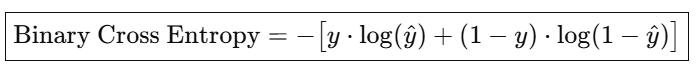

y → the true label (0 or 1)

𝑦
^
​
  → the predicted probability(between 0 and 1)


If
𝑦
=
1
y=1, then
(
1
−
𝑦
)
=
0
(1−y)=0 → second term gone

If
𝑦
=
0
y=0, then
(
1
−
𝑦
)
=
1
(1−y)=1 → first term gone
It tells the loss:

“Focus on
𝑦
^
y
^
​
 ” if the answer should be 1.

“Focus on
1
−
𝑦
^
1−
y
^
​
 ” if the answer should be 0.

Lower cross entropy = better predictions.

In [ ]:
import numpy as np

# Example: Binary Cross-Entropy
actual = np.array([1, 0, 1, 0])  # True labels
predicted = np.array([0.8, 0.2, 0.6, 0.4])  # Predicted probabilities

cross_entropy = -(actual * np.log(predicted) + (1 - actual) * np.log(1 - predicted)).mean()
print(f"Binary Cross-Entropy: {cross_entropy:.4f}")

Binary Cross-Entropy: 0.3670


MANUAL CALCULATION OF THE FORMULA :

y_true = [1, 0, 1, 0]

y_pred = [0.8, 0.2, 0.6, 0.4]

Sample-wise losses:

-1 * log(0.8) ≈ 0.2231

-0 * log(0.2) - (1 - 0) * log(0.8) ≈ 0.2231

-1 * log(0.6) ≈ 0.5108

-0 * log(0.4) - (1 - 0) * log(0.6) ≈ 0.5108

Sum ≈ 1.4678 ,
Mean ≈ 0.3670


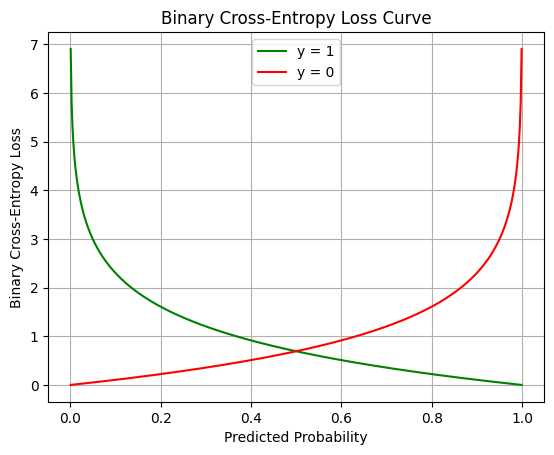

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Range of predicted probabilities with 500 numbers
p_pred = np.linspace(0.001, 0.999, 500)

# Cross-entropy loss when true label y = 1
loss_y1 = -(1 * np.log(p_pred) + (1 - 1) * np.log(1 - p_pred))    # formula

# Cross-entropy loss when true label y = 0
loss_y0 = -(0 * np.log(p_pred) + (1 - 0) * np.log(1 - p_pred))

# Plot both curves
plt.plot(p_pred, loss_y1, label='y = 1', color='green')
plt.plot(p_pred, loss_y0, label='y = 0', color='red')
plt.xlabel('Predicted Probability')
plt.ylabel('Binary Cross-Entropy Loss')
plt.title('Binary Cross-Entropy Loss Curve')
plt.legend()
plt.grid(True)
plt.show()


Cross-Entropy for Multiple Classes

Multiclass cross-entropy looks at the predicted probability for the true class and takes
−
log
⁡
−log of it — the higher your confidence in the right answer, the lower the loss.

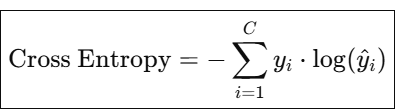

C → number of classes

𝑦
𝑖
  → true label for class
𝑖
i (one-hot encoded: 0 or 1)

𝑦
^
𝑖
​
  → predicted probability for class
𝑖


In [ ]:
import numpy as np

def cross_entropy(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-12, 1. - 1e-12)  # avoid log(0)
    cross_entropy = -np.sum(y_true * np.log(y_pred)) / y_true.shape[0]
    return cross_entropy

# test
y_true = np.array([[1, 0, 0]])
y_pred = np.array([[0.7, 0.2, 0.1]])
result = cross_entropy(y_true, y_pred)
print(f"Cross-Entropy: {result:.4f}")


Cross-Entropy: 0.3567


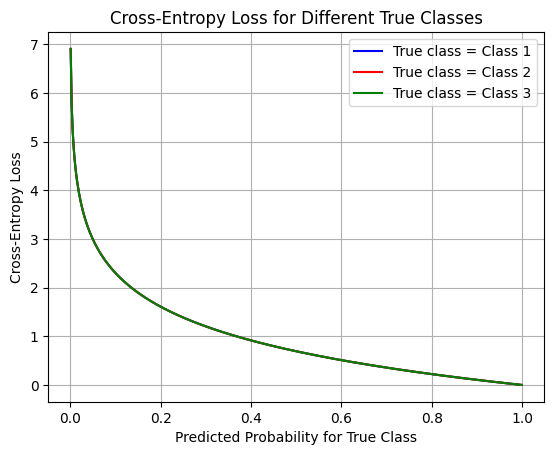

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Predicted probabilities for the true class from 0 to 1
p_true = np.linspace(0.001, 0.999, 500)

# Compute loss curves for each class
loss_class1 = -np.log(p_true)
loss_class2 = -np.log(p_true)
loss_class3 = -np.log(p_true)
plt.plot(p_true, loss_class1, label='True class = Class 1', color='blue')
plt.plot(p_true, loss_class2, label='True class = Class 2', color='red')
plt.plot(p_true, loss_class3, label='True class = Class 3', color='green')

plt.xlabel('Predicted Probability for True Class')
plt.ylabel('Cross-Entropy Loss')
plt.title('Cross-Entropy Loss for Different True Classes')
plt.legend()
plt.grid(True)
plt.show()


The graph shows how cross-entropy loss drops as the model becomes more

1.   List item

1.   List item
2.   List item


2.   List item

confident in the true class for any class

KL DIVERGENCE

KL divergence tells you how far your whole predicted probabilities are from the true probabilities








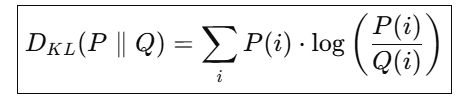

::q is reference and p is current ;
we find how much p (current) has changed changed relative to Q (reference ) .

non-symmetric measure of the difference between two probability distributions, P and Q
KL Divergence can be interpreted as the average difference in the number of bits required to encode samples of P using a code optimized for Q, rather than one optimized for P.

In [ ]:
import numpy as np

def kl_divergence(P, Q):
    epsilon = 1e-12  # to avoid log(0)
    P = np.clip(P, epsilon, 1)
    Q = np.clip(Q, epsilon, 1)
    return np.sum(P * np.log(P / Q))
P = np.array([0.7, 0.3])
Q = np.array([0.6, 0.4])

kl = kl_divergence(P, Q)
print(f"KL Divergence: {kl:.4f}")



KL Divergence: 0.0216


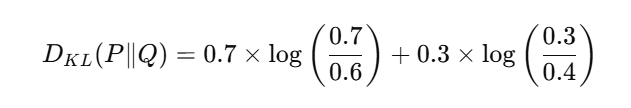

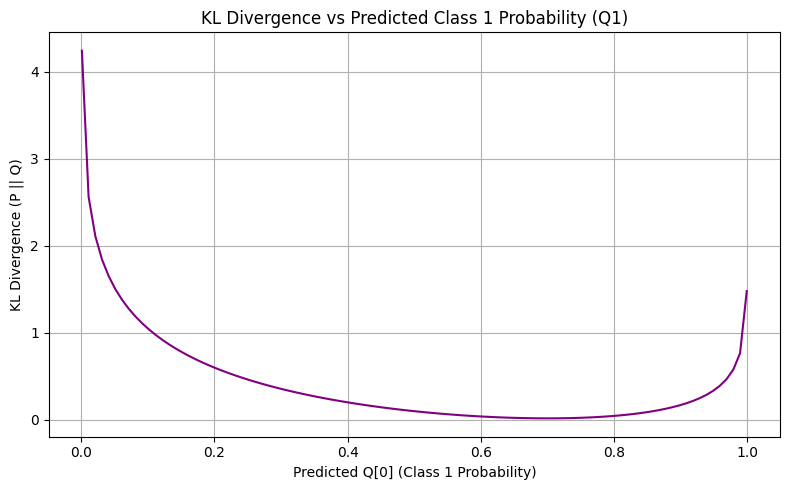

In [2]:
P = np.array([0.7, 0.2, 0.1])
# for a range
q1_values = np.linspace(0.001, 0.999, 100)
kl_values = []
for q1 in q1_values:
    q2 = (1 - q1) / 2
    q3 = (1 - q1) / 2
    Q = np.array([q1, q2, q3])
#cal
    kl = np.sum(P * np.log(P / Q))
    kl_values.append(kl)
plt.figure(figsize=(8, 5))
plt.plot(q1_values, kl_values, color='purple')
plt.title('KL Divergence vs Predicted Class 1 Probability (Q1)')
plt.xlabel('Predicted Q[0] (Class 1 Probability)')
plt.ylabel('KL Divergence (P || Q)')
plt.grid(True)
plt.tight_layout()
plt.show()


KL Divergence is lowest when Q ≈ P
It increases rapidly when predictions deviate from the true distribution



HINGE LOSS

Hinge loss is used for binary classification, mainly in SVMs

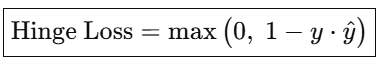

Hinge loss punishes predictions that are wrong or not confident enough, and is zero when predictions are confidently correct.

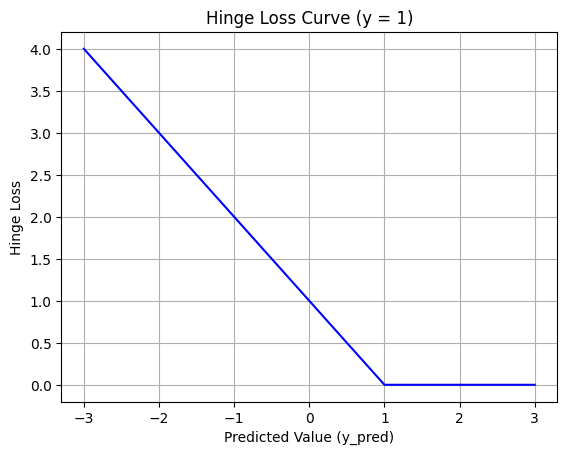

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# True label
y = 1

y_pred = np.linspace(-3, 3, 500)
loss = np.maximum(0, 1 - y * y_pred)

plt.plot(y_pred, loss, color='blue')
plt.xlabel('Predicted Value (y_pred)')
plt.ylabel('Hinge Loss')
plt.title('Hinge Loss Curve (y = 1)')
plt.grid(True)
plt.show()
